# Distributions

Interesting sources: 
- https://app.datacamp.com/learn/courses/foundations-of-probability-in-python

In [24]:
import numpy as np
import pandas as pd

# Uniform distribution

## Rolling a 6-sided die

![](https://wherethewindsblow.com/wp-content/uploads/2023/06/JUMBO-Six-sided-white-dice.jpg)

We are simulating the process of rolling a standard six-sided die. Each roll produces a random integer between 1 and 6, with all outcomes being equally likely. By generating multiple samples within this range, we can observe how the distribution of results begins to resemble a uniform distribution as the number of rolls increases.

In [ ]:
minValue = 1 #  
maxValue = 6 # Maximum value of the dice
numberOfSamples = 6 # Increase number to show that it converges to a uniform distribution

Now we simulate rolling the die ```numberOfSamples``` times:
If you rerun the script you can see that the values change, just like a 'real' die.

In [25]:
results = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=numberOfSamples) )
results

0    2
1    2
2    1
3    3
4    4
5    3
dtype: int32

<Axes: >

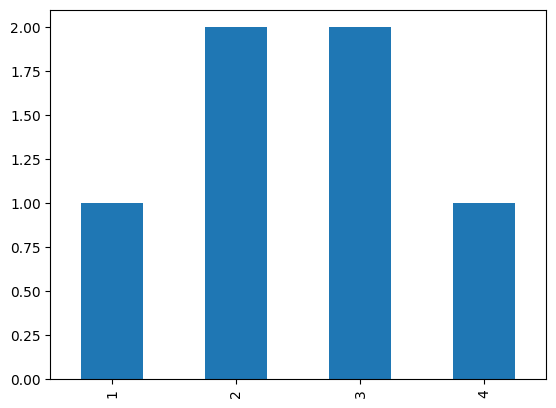

In [26]:
results.value_counts().sort_index().plot(kind='bar')

## Normal distribution

### Sampling from the average length of  a full-grown citizen in the Netherlands.

Mean = Median = Mode (all located in the center)

Symmetrical around the mean

Approximately:

- 68% of the values fall within 1 standard deviation of the mean
- 95% within 2 standard deviations
- 99.7% within 3 standard deviations

(This is known as the empirical rule or 68-95-99.7 rule)

In [27]:
averageLength = 174.25 # Average length of a person in cm
stdLength = 8 # Standard deviation of the length of a person in cm
numberOfPeopleToSample = 3000 # Play with these values to show the impact on the histogram

In [28]:
randomLengths = pd.Series( np.random.normal(averageLength, stdLength, numberOfPeopleToSample) )
randomLengths.head()

0    177.192333
1    186.127854
2    185.259210
3    172.098987
4    168.818584
dtype: float64

<Axes: ylabel='Frequency'>

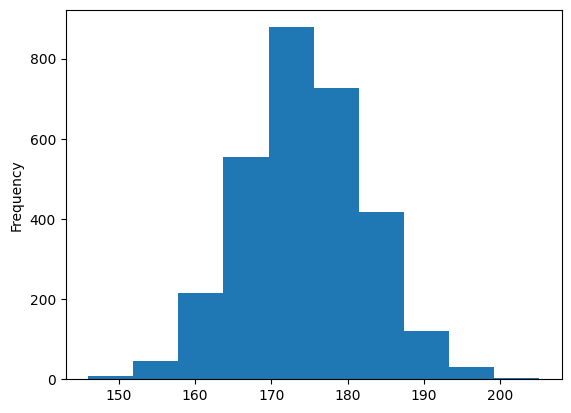

In [29]:
randomLengths.plot(kind='hist', bins=10)

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Standard_deviation_diagram.svg 'Normal distribution')

### Examples of normal distribution in real life
- https://studiousguy.com/real-life-examples-normal-distribution/
- https://galtonboard.com/probabilityexamplesinlife

### Central limit theorem

**What is the Central Limit Theorem?**
In simple terms:

If you take many random samples of a certain size from any population, and calculate the mean of each sample, then the distribution of those sample means will:
- Be approximately normal (bell-shaped)
- Have the same average as the original population
- Have a smaller spread (standard deviation gets smaller as sample size increases)
- Even if the original data is not normally distributed!

**Why is this useful?**
Because it lets us:
- Use normal distribution tools (like confidence intervals) on data that isn't normal
- Make predictions and inferences about population averages
- Justify why the mean is a reliable estimate with large samples



In [33]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomLengths = pd.Series( np.random.normal(averageLength, stdLength, sampleSize) ) 
    sampleMeans.append(randomLengths.mean()) 

In [34]:
sampleMeans

[np.float64(173.51431051802646),
 np.float64(174.48132534376106),
 np.float64(175.76315899084014),
 np.float64(174.71087407464805),
 np.float64(173.55853953286737),
 np.float64(173.80988326279478),
 np.float64(174.493795975022),
 np.float64(173.25967502854098),
 np.float64(174.4788985252813),
 np.float64(175.86045110378615),
 np.float64(174.74238669534282),
 np.float64(173.59245932977413),
 np.float64(174.9291438805309),
 np.float64(174.224904330723),
 np.float64(175.39882946175126),
 np.float64(173.5045195623261),
 np.float64(173.75210918102556),
 np.float64(173.38093127744122),
 np.float64(174.77323815542346),
 np.float64(174.7940766674589),
 np.float64(172.5051490015474),
 np.float64(174.98089970836966),
 np.float64(173.7758018875816),
 np.float64(174.55278649854742),
 np.float64(174.3824796288159),
 np.float64(174.07208289271202),
 np.float64(173.6365154448882),
 np.float64(173.9543801214101),
 np.float64(174.55851154264343),
 np.float64(171.82917696895208),
 np.float64(173.9890212

<Axes: ylabel='Frequency'>

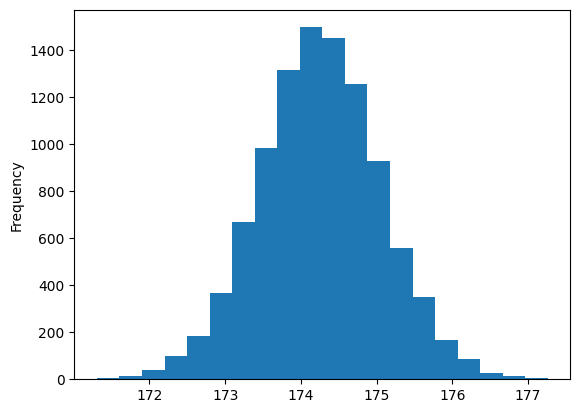

In [36]:
pd.Series(sampleMeans).plot(kind='hist', bins = 20)

In [37]:
sampleMeans = []
sampleSize = 100
sampleMeansSize = 10000

for i in range(sampleMeansSize):
    randomRolls = pd.Series( np.random.randint(low=minValue, high=maxValue + 1, size=sampleSize) )
    sampleMeans.append(randomRolls.mean())

<Axes: ylabel='Frequency'>

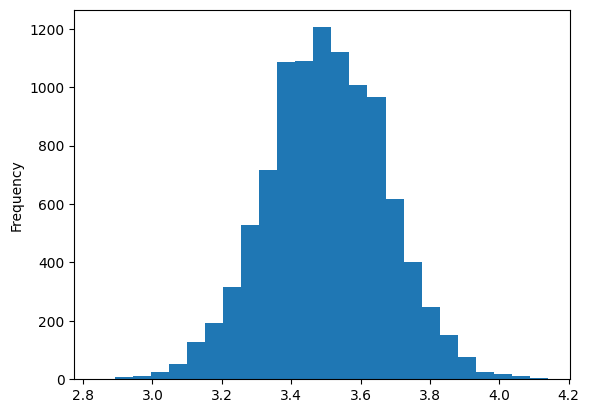

In [38]:
pd.Series(sampleMeans).plot(kind='hist', bins = 25)

### Confidence interval

**What is a Confidence Interval?**
A confidence interval is a range of values that we believe is likely to contain the true population parameter (like the mean or proportion), based on a sample.

Usually, we talk about the **mean**, so let’s focus on that:

A 95% confidence interval for the mean says:
“We are 95% confident that the true population mean lies within this range.”


![](https://datatab.net/assets/tutorial/confidence_interval.png)

![](https://datatab.net/assets/tutorial/Confidence_interval_formula.png)

So let's reconsider one sample. Based on this one sample, what can we say about the mean of the underlying population?

In [39]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomLengths)-1, loc=randomLengths.mean(), scale=st.sem(randomLengths))

(np.float64(171.33348906174822), np.float64(174.35041222408134))

And how about rolling a dice?

In [40]:
import scipy.stats as st
confidence = 0.95
st.t.interval(confidence, len(randomRolls)-1, loc=randomRolls.mean(), scale=st.sem(randomRolls))

(np.float64(2.9619595268789958), np.float64(3.6180404731210043))

Let's apply this to the iris dataset. What is the 95% confidence interval of the sepal_length? Meaning, let's calculate the interval that contains the real mean sepal length with 95% confidence.

In [41]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
import scipy.stats as st
confidence = 0.98
st.t.interval(confidence, len(iris)-1, loc=iris['sepal_length'].mean(), scale=st.sem(iris['sepal_length']))

(np.float64(5.684336202794043), np.float64(6.0023304638726245))

### Portfolio assignment 7
15 min: Look at the histogram of at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you recognise the distribution? Does it look like a uniform or normal distribution or something else? If it doesn't look like a uniform or normal distribution, take a quick look here to see if you can find the distribution shape: https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm


![](https://i.imgur.com/0v1CGNV.png)<br>
Findings: ...<br>

### Portfolio assignment 8
15 min: 
- Calculate the 90%, 95%, 99% and 99.99% confidence interval for at least 2 columns with numerical data in the dataset that you chose in portfolio assignment 4. Do you see the impact the confidence has on the interval?
- Now calculate the 95% confidence interval again but use only the first 10% of your rows. Compare this interval to the previous 95% confidence interval you calculated. Do you see the impact of having less data?

![](https://i.imgur.com/0v1CGNV.png)<br>
Assumptions: ...<br>
Findings: ...<br>